In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
clas6_all = pd.read_csv('clas6/clas6_all.txt')
clas6_all.head()

,Q2,x,z,pT2,phi,data_xs,data_xs_err,data_xs_sys,data_xs_RC,tra_bnxs,tra_rcxs,tra_rcxs_err,Fac_bnxs,Fac_rcxs,Fac_rcxs_err
0,1.49,0.1468,0.0682,0.0049,-0.174533,0.010338,0.003383,0.028800,1.1437,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
1,1.49,0.1468,0.0682,0.0049,0.174533,0.010447,0.003276,0.029105,1.1437,0.000511,0.000132,1.607906e-07,0.000000,0.000000,0.000000e+00
2,1.49,0.1468,0.0682,0.0259,-2.967060,0.007477,0.000581,0.000945,1.0944,0.000467,0.000122,1.512178e-07,0.004125,0.004293,8.164685e-08
3,1.49,0.1468,0.0682,0.0259,-2.617994,0.007098,0.001826,0.000896,1.1008,0.000466,0.000121,1.448981e-07,0.004125,0.004293,8.164685e-08
4,1.49,0.1468,0.0682,0.0259,-2.268928,0.006618,0.000392,0.000835,1.1139,0.000465,0.000121,1.249906e-07,0.004125,0.004293,8.164685e-08


In [3]:
clas6_all[clas6_all['data_xs_RC']>0].describe()

,Q2,x,z,pT2,phi,data_xs,data_xs_err,data_xs_sys,data_xs_RC,tra_bnxs,tra_rcxs,tra_rcxs_err,Fac_bnxs,Fac_rcxs,Fac_rcxs_err
count,112302.000000,112302.000000,112302.000000,112302.000000,112302.000000,1.123020e+05,1.123020e+05,1.123020e+05,112302.000000,1.123020e+05,1.123020e+05,1.123020e+05,112302.000000,112302.000000,1.123020e+05
mean,2.886744,0.432844,0.390926,0.173208,0.000087,6.747359e-05,1.126057e-05,1.168438e-05,0.972223,2.021898e-05,5.051569e-06,3.164154e-09,0.000118,0.000109,3.664394e-09
std,1.058439,0.162969,0.190251,0.217199,1.674359,2.548843e-04,5.973649e-05,1.777771e-04,0.080681,4.109878e-05,1.147130e-05,1.145410e-08,0.000296,0.000285,8.299501e-09
min,1.490000,0.146800,0.068200,0.004900,-2.967060,1.550900e-08,1.076025e-08,2.506000e-09,0.657400,-6.780785e-08,-8.385386e-09,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.020000,0.302500,0.236200,0.025900,-1.221730,2.834562e-06,5.309062e-07,3.925500e-07,0.924200,1.290063e-06,2.170230e-07,4.198404e-11,0.000002,0.000002,6.220086e-11
50%,2.370000,0.413400,0.374800,0.065500,0.174533,1.048338e-05,1.680512e-06,1.460275e-06,0.963300,4.975457e-06,9.560441e-07,3.004715e-10,0.000018,0.000015,6.137342e-10
75%,3.420000,0.539700,0.539700,0.216500,1.221730,3.940437e-05,5.967875e-06,5.463375e-06,1.008700,1.878777e-05,4.121288e-06,1.504936e-09,0.000088,0.000077,3.090385e-09
max,6.610000,0.906300,0.906300,1.554000,2.967060,1.044725e-02,5.952500e-03,2.910500e-02,2.725600,5.106698e-04,1.463571e-04,2.354447e-07,0.004401,0.004518,1.189620e-07


In [4]:
print('Q2',clas6_all['Q2'].unique())
print('x',clas6_all['x'].unique())
print('z',clas6_all['z'].unique())
print('pT2',clas6_all['pT2'].unique())

Q2 [1.49 1.74 2.02 2.37 2.93 3.42 4.1  4.85 5.72 6.61]
x [0.1468 0.1753 0.2051 0.2362 0.2686 0.3025 0.3379 0.3748 0.4134 0.4537
 0.4958 0.5397 0.5855 0.6334 0.6834 0.7355 0.79   0.8469 0.9063]
z [0.0682 0.0933 0.1194 0.1468 0.1753 0.2051 0.2362 0.2686 0.3025 0.3379
 0.3748 0.4134 0.4537 0.4958 0.5397 0.5855 0.6334 0.6834 0.7355 0.79
 0.8469 0.9063]
pT2 [0.0049 0.0259 0.0655 0.129  0.2165 0.3402 0.5074 0.7427 1.0741 1.554 ]


In [5]:
Q2_list=clas6_all['Q2'].unique()
x_list=clas6_all['x'].unique()
z_list=clas6_all['z'].unique()
pT2_list=clas6_all['pT2'].unique()
phi_list=clas6_all['phi'].unique()
print('Q2 len ',len(Q2_list),' x len ',len(x_list),' z len ',len(z_list),' pT2 len ',len(pT2_list),' phi len ',len(phi_list))


Q2 len  10  x len  19  z len  22  pT2 len  10  phi len  18


In [6]:
i_Q2,i_x,i_z,i_pT2,i_phi = (2,3,10,6,7)


In [7]:
print('Q2:',Q2_list[i_Q2],' x:',x_list[i_x],' z:',z_list[i_z],' pT2:',pT2_list[i_pT2],' phi:',phi_list[i_phi])

Q2: 2.02  x: 0.2362  z: 0.3748  pT2: 0.5074  phi: -1.22173


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/3577334062.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/3577334062.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/3577334062.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/3577334062.

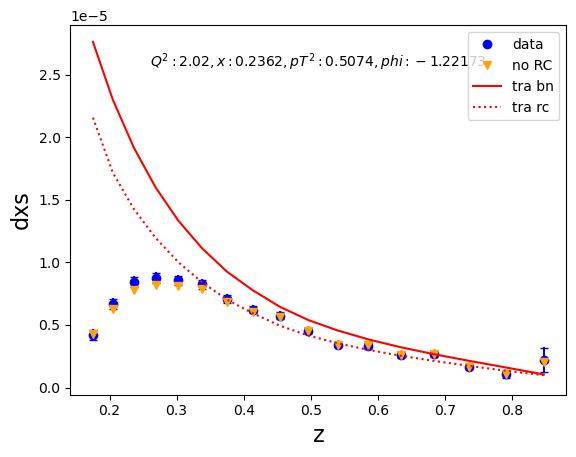

In [8]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_z = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
zs = df_z['z'].to_list()
data_xs = df_z['data_xs']
data_xs_err = df_z['data_xs_err']
data_xs_sys = df_z['data_xs_sys']
data_xs_RC = df_z['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_z['tra_bnxs']
tra_rc = df_z['tra_rcxs']
fac_bn = df_z['Fac_bnxs']
fac_rc = df_z['Fac_rcxs']
for iz in zs:
    xs = df_z[df_z['z']==iz]['data_xs'].values[0]
    xs_stat_err = df_z[df_z['z']==iz]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([iz,iz],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_z[df_z['z']==iz]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(zs,data_xs,'bo',label='data')
plt.plot(zs,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(zs,x_list[i_x]*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(zs,x_list[i_x]*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
#plt.plot(zs,x_list[i_x]*2*5.75*0.938*fac_bn/(2*math.pi),color='magenta',label='fac bn')
#plt.plot(zs,x_list[i_x]*2*5.75*0.938*fac_rc/(2*math.pi),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$Q^2:{},x:{},pT^2:{},phi:{}$'.format(Q2_list[i_Q2],x_list[i_x],pT2_list[i_pT2],phi_list[i_phi]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('z',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2{}_x{}_pT2{}_phi{}_z.pdf'.format(i_Q2,i_x,i_pT2,i_phi))

[0.2051, 0.2362, 0.2686, 0.3025, 0.3379]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/2571597553.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_x = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['z']==z_list[i_z]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/2571597553.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_x = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['z']==z_list[i_z]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/2571597553.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_x = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['z']==z_list[i_z]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/2571597553.

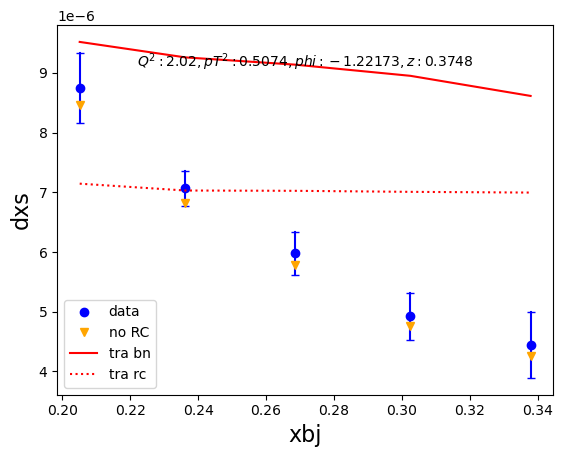

In [9]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_x = clas6_all[clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['z']==z_list[i_z]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
xbjs = df_x['x'].to_list()
print(xbjs)
data_xs = df_x['data_xs']
data_xs_err = df_x['data_xs_err']
data_xs_sys = df_x['data_xs_sys']
data_xs_RC = df_x['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_x['tra_bnxs']
tra_rc = df_x['tra_rcxs']
fac_bn = df_x['Fac_bnxs']
fac_rc = df_x['Fac_rcxs']
for ix in xbjs:
    xs = df_x[df_x['x']==ix]['data_xs'].values[0]
    xs_stat_err = df_x[df_x['x']==ix]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([ix,ix],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_x[df_x['x']==ix]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(xbjs,data_xs,'bo',label='data')
plt.plot(xbjs,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(xbjs,x_list[i_x]*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(xbjs,x_list[i_x]*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
#plt.plot(xbjs,x_list[i_x]*2*5.75*0.938*fac_bn/(2*math.pi),color='magenta',label='fac bn')
#plt.plot(xbjs,x_list[i_x]*2*5.75*0.938*fac_rc/(2*math.pi),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$Q^2:{},pT^2:{},phi:{},z:{}$'.format(Q2_list[i_Q2],pT2_list[i_pT2],phi_list[i_phi],z_list[i_z]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('xbj',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2{}_x_pT2{}_phi{}_z{}.pdf'.format(i_Q2,i_x,i_pT2,i_phi))

/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/1753140319.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Q2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/1753140319.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Q2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/1753140319.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Q2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/1753140319.py:23:

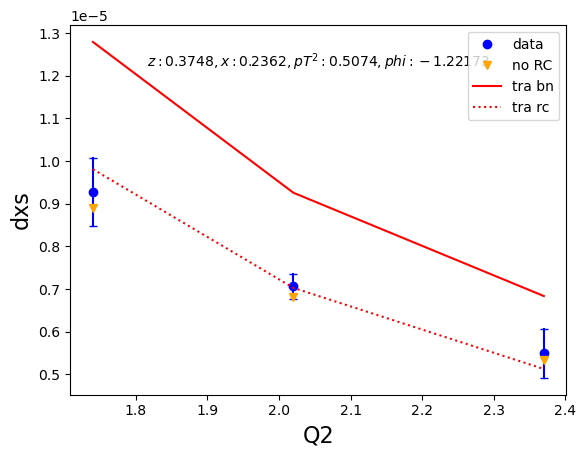

In [10]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_Q2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['pT2']==pT2_list[i_pT2]][clas6_all['phi']==phi_list[i_phi]]
Q2s = df_Q2['Q2'].to_list()
data_xs = df_Q2['data_xs']
data_xs_err = df_Q2['data_xs_err']
data_xs_sys = df_Q2['data_xs_sys']
data_xs_RC = df_Q2['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_Q2['tra_bnxs']
tra_rc = df_Q2['tra_rcxs']
fac_bn = df_Q2['Fac_bnxs']
fac_rc = df_Q2['Fac_rcxs']
for iQ2 in Q2s:
    xs = df_Q2[df_Q2['Q2']==iQ2]['data_xs'].values[0]
    xs_stat_err = df_Q2[df_Q2['Q2']==iQ2]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([iQ2,iQ2],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_Q2[df_Q2['Q2']==iQ2]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(Q2s,data_xs,'bo',label='data')
plt.plot(Q2s,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(Q2s,x_list[i_x]*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(Q2s,x_list[i_x]*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
#plt.plot(Q2s,x_list[i_x]*2*5.75*0.938*fac_bn/(2*math.pi),color='magenta',label='fac bn')
#plt.plot(Q2s,x_list[i_x]*2*5.75*0.938*fac_rc/(2*math.pi),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$z:{},x:{},pT^2:{},phi:{}$'.format(z_list[i_z],x_list[i_x],pT2_list[i_pT2],phi_list[i_phi]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('Q2',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2_x{}_pT2{}_phi{}_z{}.pdf'.format(i_x,i_pT2,i_phi,i_z))

/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/2535097626.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pT2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/2535097626.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pT2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/2535097626.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pT2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['phi']==phi_list[i_phi]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/2535097626.py:23: UserW

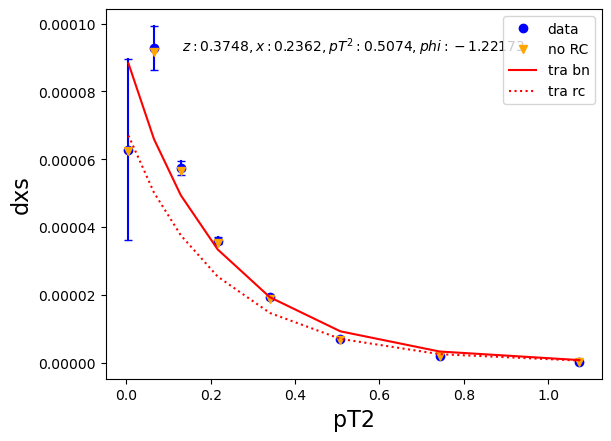

In [11]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_pT2 = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['phi']==phi_list[i_phi]]
pT2s = df_pT2['pT2'].to_list()
data_xs = df_pT2['data_xs']
data_xs_err = df_pT2['data_xs_err']
data_xs_sys = df_pT2['data_xs_sys']
data_xs_RC = df_pT2['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_pT2['tra_bnxs']
tra_rc = df_pT2['tra_rcxs']
fac_bn = df_pT2['Fac_bnxs']
fac_rc = df_pT2['Fac_rcxs']
for ipT2 in pT2s:
    xs = df_pT2[df_pT2['pT2']==ipT2]['data_xs'].values[0]
    xs_stat_err = df_pT2[df_pT2['pT2']==ipT2]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([ipT2,ipT2],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_pT2[df_pT2['pT2']==ipT2]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(pT2s,data_xs,'bo',label='data')
plt.plot(pT2s,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(pT2s,x_list[i_x]*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(pT2s,x_list[i_x]*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
#plt.plot(pT2s,x_list[i_x]*2*5.75*0.938*fac_bn/(2*math.pi),color='magenta',label='fac bn')
#plt.plot(pT2s,x_list[i_x]*2*5.75*0.938*fac_rc/(2*math.pi),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$z:{},x:{},pT^2:{},phi:{}$'.format(z_list[i_z],x_list[i_x],pT2_list[i_pT2],phi_list[i_phi]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('pT2',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2{}_x{}_pT2_phi{}_z{}.pdf'.format(i_Q2,i_x,i_phi,i_z))

/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/3361899477.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_phi = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['pT2']==pT2_list[i_pT2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/3361899477.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_phi = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['pT2']==pT2_list[i_pT2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/3361899477.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_phi = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['pT2']==pT2_list[i_pT2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_23703/3361899477.py:23: UserW

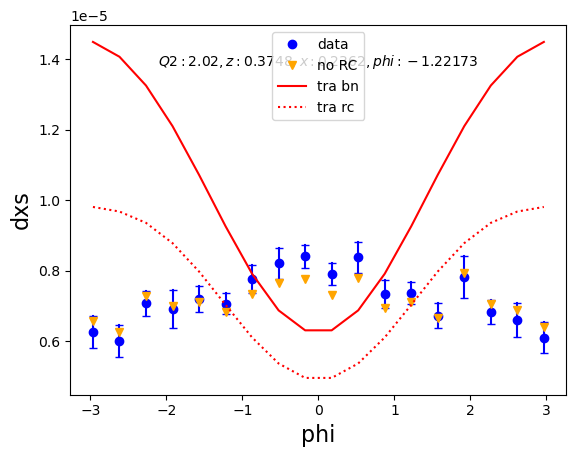

In [12]:
#plot as a function of z
fig = plt.figure()
ax = fig.add_subplot()
df_phi = clas6_all[clas6_all['z']==z_list[i_z]][clas6_all['x']==x_list[i_x]][clas6_all['Q2']==Q2_list[i_Q2]][clas6_all['pT2']==pT2_list[i_pT2]]
phis = df_phi['phi'].to_list()
data_xs = df_phi['data_xs']
data_xs_err = df_phi['data_xs_err']
data_xs_sys = df_phi['data_xs_sys']
data_xs_RC = df_phi['data_xs_RC']
data_xs_beforeRC = []
tra_bn = df_phi['tra_bnxs']
tra_rc = df_phi['tra_rcxs']
fac_bn = df_phi['Fac_bnxs']
fac_rc = df_phi['Fac_rcxs']
for iphi in phis:
    xs = df_phi[df_phi['phi']==iphi]['data_xs'].values[0]
    xs_stat_err = df_phi[df_phi['phi']==iphi]['data_xs_err'].values[0]
    #print(xs)
    ax.plot([iphi,iphi],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
    RC = df_phi[df_phi['phi']==iphi]['data_xs_RC'].values[0]
    data_xs_beforeRC.append(xs/RC)
plt.plot(phis,data_xs,'bo',label='data')
plt.plot(phis,data_xs_beforeRC,'o',marker='v',color='orange',label='no RC')
plt.plot(phis,x_list[i_x]*2*5.75*0.938*tra_bn,color='red',label='tra bn')
plt.plot(phis,x_list[i_x]*2*5.75*0.938*(tra_bn-tra_rc),color='red',linestyle=':',label='tra rc')
#plt.plot(phis,x_list[i_x]*2*5.75*0.938*fac_bn/(2*math.pi),color='magenta',label='fac bn')
#plt.plot(phis,x_list[i_x]*2*5.75*0.938*fac_rc/(2*math.pi),color='magenta',linestyle=':',label='fac rc')
ax.text(0.5,0.9,r'$Q2:{},z:{},x:{},phi:{}$'.format(Q2_list[i_Q2],z_list[i_z],x_list[i_x],phi_list[i_phi]), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.xlabel('phi',fontsize=16)
plt.ylabel('dxs',fontsize=16)
plt.legend()
plt.savefig('results/data_compare/clas6/Q2{}_x{}_pT2{}_phi_z{}.pdf'.format(i_Q2,i_x,i_pT2,i_z))